<a href="https://colab.research.google.com/github/Wongkaihung/Practical-Discrete-Mathematics/blob/master/Assignment_4_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q4. You are tasked with creating a decision tree classifier to sort new students into one of
the four Hogwarts houses: Gryffindor, Hufflepuff, Ravenclaw or Slytherin. The dataset
contains various attributes of students such as bravery, loyalty, intelligence, and
ambition.
Dataset:
The dataset is provided in a CSV file named hogwarts_students.csv with the following
columns:
• Bravery: a score from 1 to 10 indicating the student’s bravery.
• Loyalty: a score from 1 to 10 indicating the student’s loyalty.
• Intelligence: a score from 1 to 10 indicating the student’s intelligence
• Ambition: a score from 1 to 10 indicating the student’s ambition.
• House: the house the student belongs to Gryffindor, Hufflepuff, Ravenclaw or
Slytherin


# a. Data loading and preprocessing (5 marks)
# • Load the dataset from the CSV file
# Handle any missing values if present

In [13]:
import pandas as pd

# Load the dataset
file_path = 'hogwarts_students.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Convert relevant columns to numeric (coerce non-numeric to NaN)
for col in ['Bravery', 'Loyalty', 'Intelligence', 'Ambition']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 1: Check for missing values
print("Missing values before filling:")
print(df.isnull().sum())

# Step 2: Fill missing values only for numeric columns (e.g., 'Bravery', 'Loyalty', 'Intelligence', 'Ambition')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Get only numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Fill NaN with mean

# Step 3: Handle missing values in non-numeric (categorical) columns, such as 'House'
# For categorical columns, you might want to fill with the mode (most frequent value)
df['House'].fillna(df['House'].mode()[0], inplace=True)

# Step 4: Check if there are still any missing values after filling
print("\nMissing values after filling:")
print(df.isnull().sum())

# Step 5: Display the cleaned dataset
print("\nCleaned dataset:")
print(df.head())


Missing values before filling:
Bravery         0
Loyalty         0
Intelligence    0
Ambition        0
House           0
dtype: int64

Missing values after filling:
Bravery         0
Loyalty         0
Intelligence    0
Ambition        0
House           0
dtype: int64

Cleaned dataset:
   Bravery  Loyalty  Intelligence  Ambition       House
0        8        7             9         6  Gryffindor
1        6        8             8         7  Hufflepuff
2        9        6             7         8   Ravenclaw
3        7        9             6         5   Slytherin
4        5        4             5         4  Hufflepuff


<ipython-input-13-bc7c00ac839e>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['House'].fillna(df['House'].mode()[0], inplace=True)


# b. Feature selection and splitting

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
file_path = 'hogwarts_students.csv'  # Update with the correct path to your CSV file
df = pd.read_csv(file_path)

# Step 2: Feature Selection
# Select the features (X) and the target (y)
X = df[['Bravery', 'Loyalty', 'Intelligence', 'Ambition']]  # Features (predictors)
y = df['House']  # Target variable (what we want to predict)

# Step 3: Split the dataset into training and testing sets
# We will use an 80/20 split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Display the shapes of the resulting datasets
print(f"Training data (X_train): {X_train.shape}")
print(f"Testing data (X_test): {X_test.shape}")
print(f"Training labels (y_train): {y_train.shape}")
print(f"Testing labels (y_test): {y_test.shape}")


Training data (X_train): (4, 4)
Testing data (X_test): (1, 4)
Training labels (y_train): (4,)
Testing labels (y_test): (1,)


# c. Model training

<ipython-input-15-5d6560e20f8c>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['House'].fillna(df['House'].mode()[0], inplace=True)


Accuracy of the Decision Tree Classifier: 100.00%

Classification Report:
              precision    recall  f1-score   support

  Hufflepuff       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



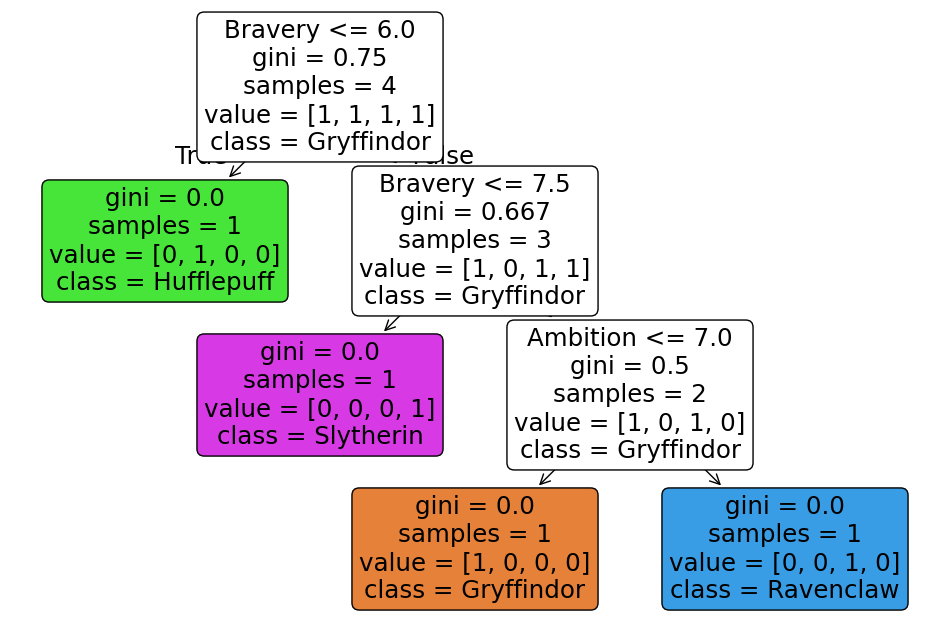

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
file_path = 'hogwarts_students.csv'  # Update with the correct path if necessary
df = pd.read_csv(file_path)

# Step 2: Convert relevant columns to numeric (coerce non-numeric to NaN)
for col in ['Bravery', 'Loyalty', 'Intelligence', 'Ambition']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Fill missing values for numeric columns with the mean and handle categorical ones with mode
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Get only numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Fill NaN with mean

# Handle missing values in non-numeric (categorical) columns, such as 'House'
df['House'].fillna(df['House'].mode()[0], inplace=True)

# Step 4: Feature Selection (X) and Target (y)
X = df[['Bravery', 'Loyalty', 'Intelligence', 'Ambition']]  # Features
y = df['House']  # Target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Visualize the Decision Tree (optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_, rounded=True)
plt.show()


# d. Model evaluation with chart

<ipython-input-16-64bef1f1fcbb>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['House'].fillna(df['House'].mode()[0], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy of the Decision Tree Classifier: 100.00%

Classification Report:
              precision    recall  f1-score   support

  Hufflepuff       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



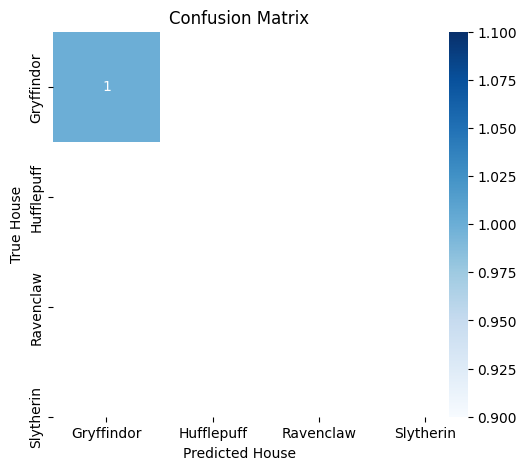

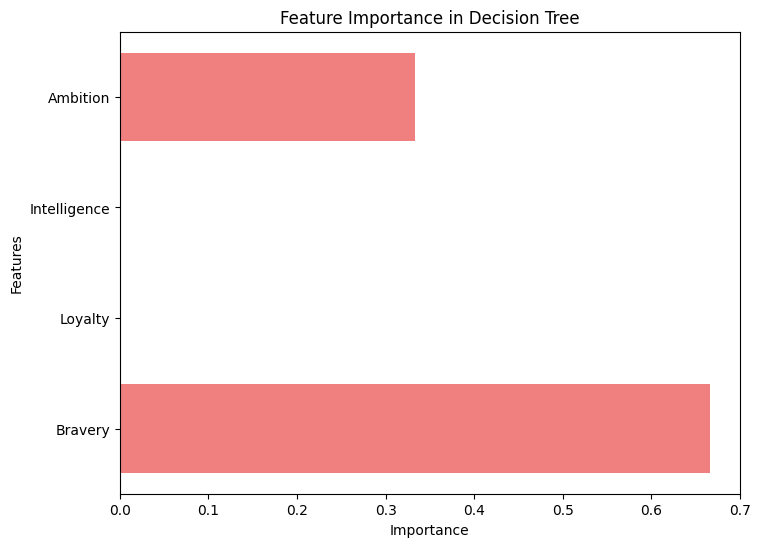

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = 'hogwarts_students.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Step 2: Convert relevant columns to numeric (coerce non-numeric to NaN)
for col in ['Bravery', 'Loyalty', 'Intelligence', 'Ambition']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Fill missing values for numeric columns with the mean and handle categorical ones with mode
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Get only numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Fill NaN with mean

# Handle missing values in non-numeric (categorical) columns, such as 'House'
df['House'].fillna(df['House'].mode()[0], inplace=True)

# Step 4: Feature Selection (X) and Target (y)
X = df[['Bravery', 'Loyalty', 'Intelligence', 'Ambition']]  # Features
y = df['House']  # Target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Model Evaluation

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted House')
plt.ylabel('True House')
plt.show()

# Step 9: Plot Feature Importance
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='lightcoral')
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# e. Prediction

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = 'hogwarts_students.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Step 2: Convert relevant columns to numeric (coerce non-numeric to NaN)
for col in ['Bravery', 'Loyalty', 'Intelligence', 'Ambition']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Fill missing values for numeric columns with the mean and handle categorical ones with mode
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Get only numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Fill NaN with mean

# Handle missing values in non-numeric (categorical) columns, such as 'House'
df['House'].fillna(df['House'].mode()[0], inplace=True)

# Step 4: Feature Selection (X) and Target (y)
X = df[['Bravery', 'Loyalty', 'Intelligence', 'Ambition']]  # Features
y = df['House']  # Target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Prediction for new students
def predict_house(bravery, loyalty, intelligence, ambition):
    # New student data (bravery, loyalty, intelligence, ambition)
    new_data = [[bravery, loyalty, intelligence, ambition]]

    # Make a prediction using the trained model
    predicted_house = model.predict(new_data)[0]

    return predicted_house

# Example predictions for new students:
new_student_1 = [8, 9, 7, 6]  # Example student: bravery=8, loyalty=9, intelligence=7, ambition=6
new_student_2 = [6, 7, 8, 5]  # Another example student

# Get the predicted house for these students
predicted_house_1 = predict_house(*new_student_1)
predicted_house_2 = predict_house(*new_student_2)

print("\nPredictions for New Students:")
print(f"New Student 1 (Bravery: 8, Loyalty: 9, Intelligence: 7, Ambition: 6) is predicted to belong to: {predicted_house_1}")
print(f"New Student 2 (Bravery: 6, Loyalty: 7, Intelligence: 8, Ambition: 5) is predicted to belong to: {predicted_house_2}")


Accuracy of the Decision Tree Classifier: 100.00%

Classification Report:
              precision    recall  f1-score   support

  Hufflepuff       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Predictions for New Students:
New Student 1 (Bravery: 8, Loyalty: 9, Intelligence: 7, Ambition: 6) is predicted to belong to: Gryffindor
New Student 2 (Bravery: 6, Loyalty: 7, Intelligence: 8, Ambition: 5) is predicted to belong to: Hufflepuff


<ipython-input-17-fff0e99f65f8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['House'].fillna(df['House'].mode()[0], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn